# Pandas Tutorial

`pandas` (short for Panel Data) is a python library which allows users to use R-like dataframes.  The functions mimic R's `data.frame` closely as they were the inspiration for `pandas`.

In this short tutorial, we'll go through some of the basic functionality of pandas.  **The library is very expansive, and you are encouraged to explore the documentation on your own**. I'm discovering new things about the library every day! At the end of this tutorial, you'll be able to work in data in pandas at a very basic level.

# Reading Data

Pandas offers lots of ways to read data into python. The most ubiqutous is likely `read_csv` which does what it says it does.

You can also read data from...:

* text files
* SQL databases 
* JSON files
* Google Big Query

and more.

Check out the documentation on I/O for more on reading and writing data.  See here: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv('2018_data.csv', parse_dates=['created_at'])

#Display the top 5 rows of the dataframe in HTML
display(df.head())

,created_at,apparentTemperature,humidity,precipIntensity,precipProbability,precipType,pressure,visibility,windBearing,windSpeed,wr
0,2018-01-02 06:28:33,-23.27,0.83,0.0,0.0,NoPrecip,1031.23,16.093,240.0,16.56,9.0
1,2018-01-02 06:58:21,-23.27,0.83,0.0,0.0,NoPrecip,1031.23,16.093,240.0,16.56,10.0
2,2018-01-02 07:27:11,-24.22,0.83,0.0,0.0,NoPrecip,1030.51,16.093,199.0,20.54,10.0
3,2018-01-02 07:58:38,-24.22,0.83,0.0,0.0,NoPrecip,1030.51,16.093,199.0,20.54,7.0
4,2018-01-02 08:27:15,-19.47,0.85,0.0,0.0,NoPrecip,1030.29,16.093,255.0,6.43,18.0


# The Basics of Data Manipulation

Dataframes are like numpy arrays but with more functionality.  If we want to access a column, we can use the `.iloc` or `.loc` method.

For more, see here: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [3]:
#Get the first column
df.iloc[:,0]


#Get the first row
df.iloc[0,:]

#Get first column by name
df.loc[:, 'created_at']

#Get multiple columns by name
df.loc[:, ['created_at','wr']]

,created_at,wr
0,2018-01-02 06:28:33,9.0
1,2018-01-02 06:58:21,10.0
2,2018-01-02 07:27:11,10.0
3,2018-01-02 07:58:38,7.0
4,2018-01-02 08:27:15,18.0
...,...,...
6419,2018-12-29 10:58:00,15.0
6420,2018-12-29 11:28:15,18.0
6421,2018-12-29 11:57:46,13.0
6422,2018-12-29 12:30:52,12.0


We can also access columns as a method.  So to access the `wr` column, we can perform `df.wr`

In [4]:
#Get the wr column as a Series by accessing the column name as a method
df.wr

0        9.0
1       10.0
2       10.0
3        7.0
4       18.0
        ... 
6419    15.0
6420    18.0
6421    13.0
6422    12.0
6423    24.0
Name: wr, Length: 6424, dtype: float64

# Summarizing Data

Dataframes and Series have their own methods for summary.  let's take a look!

Lot's of methods of summary exist, including but not limited to:

* Mean
* Median
* Min/Max
* Quantile

There are also a multitude of functions to compute between-column statistics.  See here: https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#computation



In [6]:
#Take the mean of the wr column
df.wr.mean()

#But, we can also call functions on the columns
np.mean(df.wr)


#How well correlated are apparentTemperature and wr?

df.loc[:, ['apparentTemperature','wr']].corr()


,apparentTemperature,wr
apparentTemperature,1.000000,-0.312728
wr,-0.312728,1.000000


# Other Methods on Non-Numeric Data

The `created_at` column contains dates.  We can extract different parts of those dates with some other methods!

Let's creat columns for the month and time the data was observed.

You can read more on timeedeltas and timestamps here: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [7]:
#Create a new column for time
df['time'] = df.created_at.dt.hour


#Create a new column for month
df['month'] = df.created_at.dt.month_name()


# Aggregation

Sometimes, you want to know a summary of the data per group.  The average number of people in th weight room changes by month.  Let's use `groupby` to summarize by month.

You can learn more about aggregation here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [8]:
#Aggregate by month to find mean number of people in weight room

df.groupby('month').wr.mean()


month
April        77.282609
August       32.703125
December     59.504673
February     82.136915
January      98.309013
July         38.852130
June         42.929104
March        89.785388
May          43.099638
November     79.446254
October      70.930390
September    90.729927
Name: wr, dtype: float64

# Don't Loop With Pandas, Always Vectorize

Looping through dataframes is not the most elegant or efficient way to do things.  Most computation in pandas can be done via vectorization so do it!

In [9]:
def count_months(df):
    months = {}
    for m in df.month:
        if m in months:
            months[m]+=1
        else:
            months[m]=1
            
    return months


count_months(df)

{'January': 699,
 'February': 577,
 'March': 657,
 'April': 368,
 'May': 552,
 'June': 536,
 'July': 399,
 'August': 320,
 'September': 685,
 'October': 589,
 'November': 614,
 'December': 428}

# Working With Categorical Data

Inspired by `factors` in R, `pandas` uses `pd.Categorical` to turn categorical variables into a `CategoricalDtype` column.

You can read more about categorical data here: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

In [11]:
#Turn months into an ORDERED categorical variable
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['month'] = pd.Categorical(df.month, ordered = True, categories=months)
#Watch what happens when we group by an ordered categorical variable
df.groupby('month').wr.mean()

month
January      98.309013
February     82.136915
March        89.785388
April        77.282609
May          43.099638
June         42.929104
July         38.852130
August       32.703125
September    90.729927
October      70.930390
November     79.446254
December     59.504673
Name: wr, dtype: float64

Categorical columns become really important when you are transforming data for learning.  A lot of analyses will have you one-hot-encode a categorical variable.  You can do this with pandas if your column is categorical.

In [12]:
#One Hot Encode Months
pd.get_dummies(df.month)


month,January,February,March,April,May,June,July,August,September,October,November,December
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6419,0,0,0,0,0,0,0,0,0,0,0,1
6420,0,0,0,0,0,0,0,0,0,0,0,1
6421,0,0,0,0,0,0,0,0,0,0,0,1
6422,0,0,0,0,0,0,0,0,0,0,0,1


# Plotting

Though you can pass columns to `matplotlib` just like you would arrays, pandas offers it's own API for plotting.

For more, see here: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

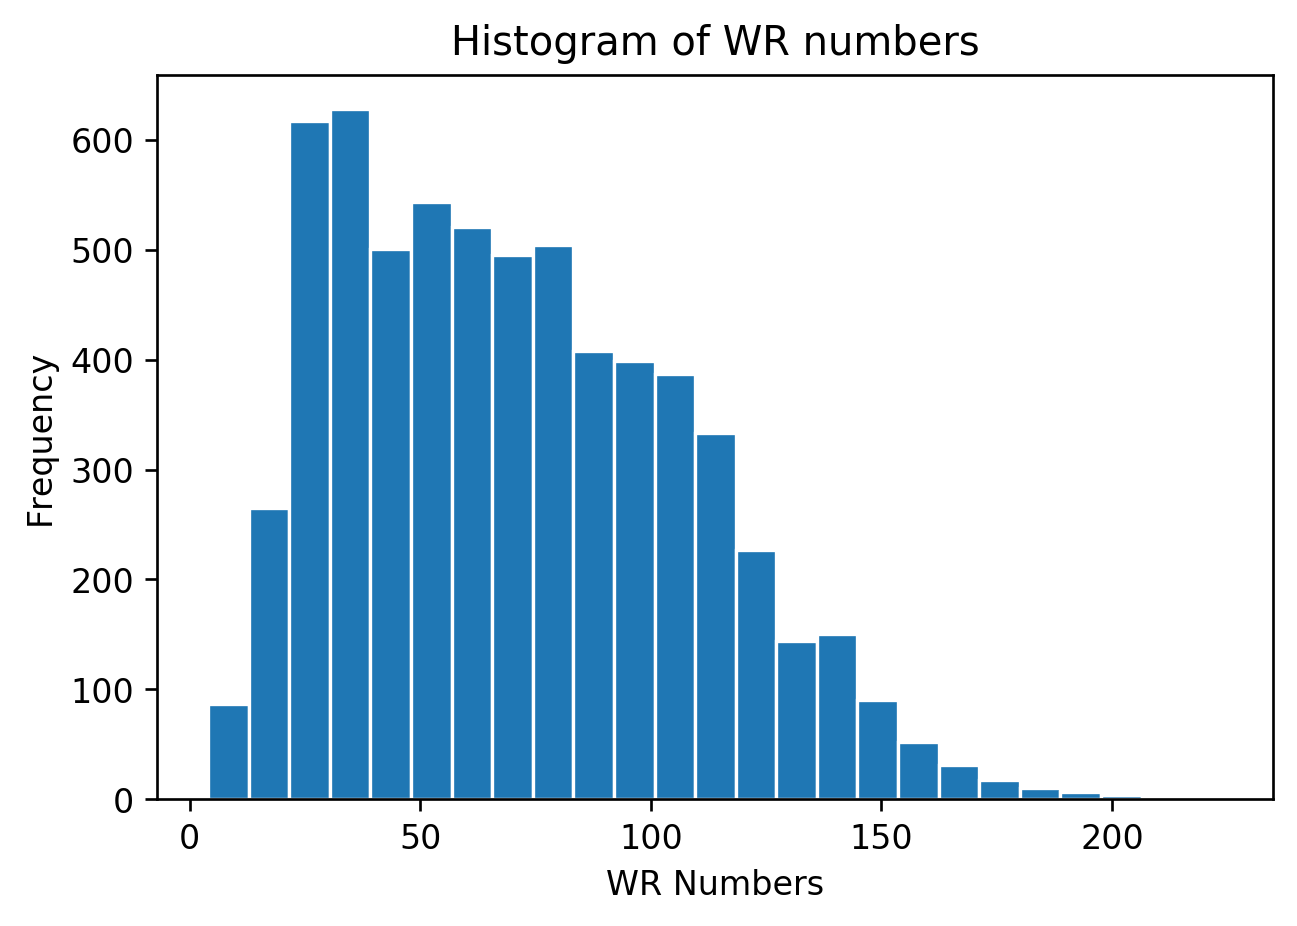

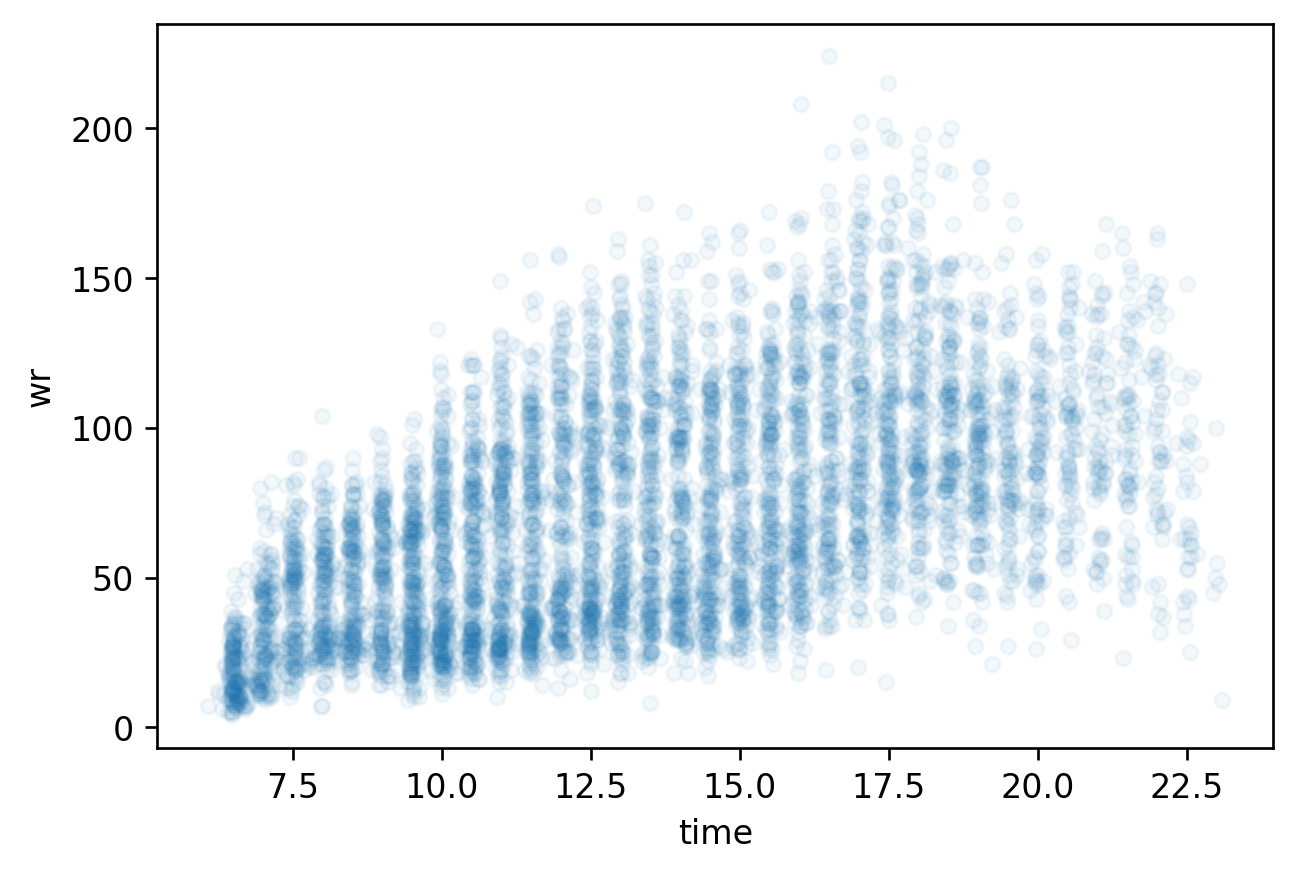

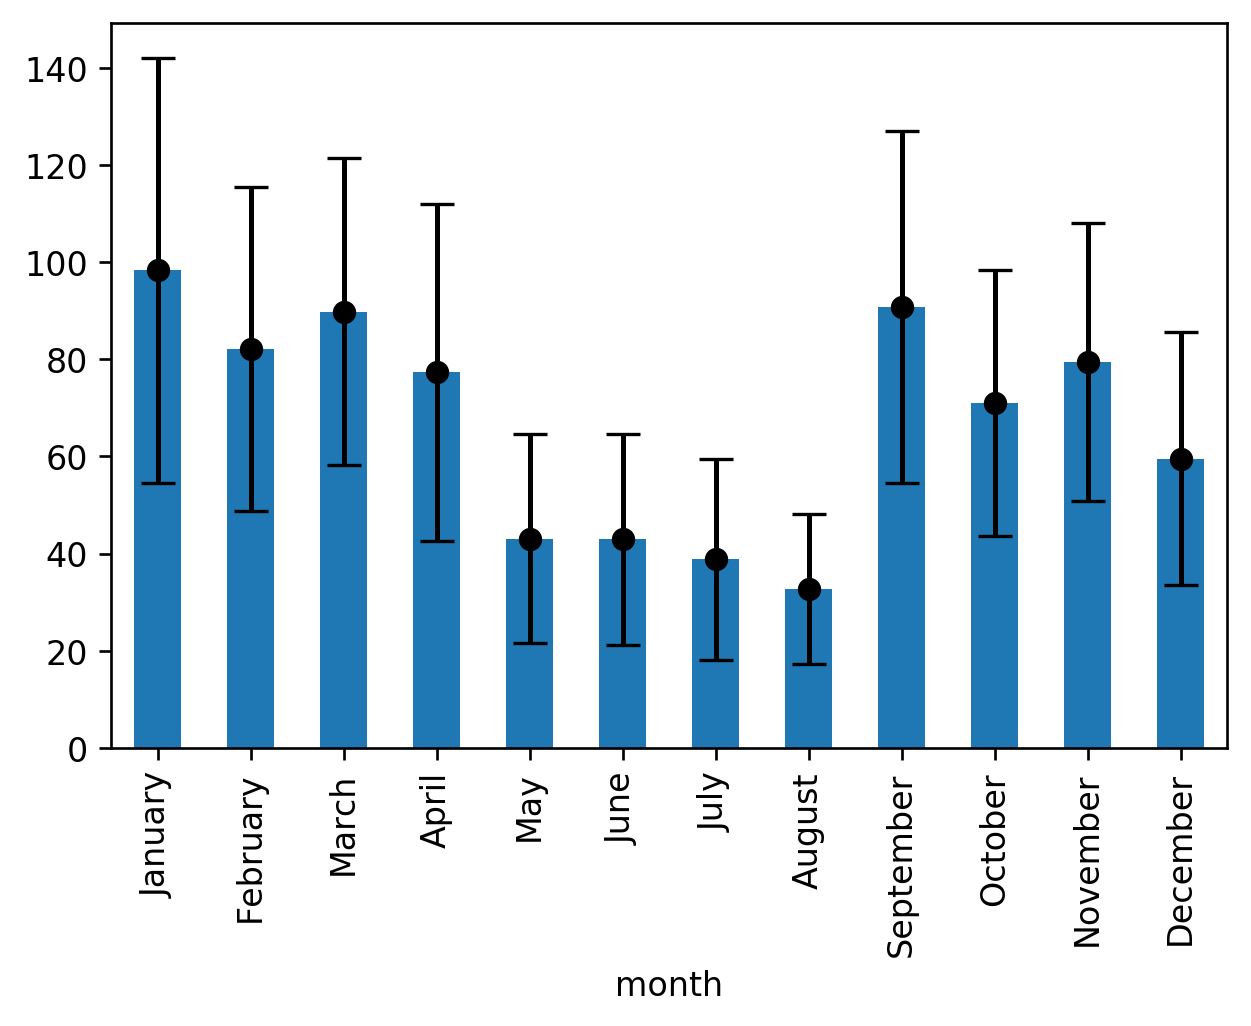

In [13]:
#A simple histogram
fig, ax = plt.subplots(dpi = 120)

df.wr.hist(ax = ax, edgecolor = 'white', bins = 25)
ax.grid(False)
ax.set_xlabel('WR Numbers')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of WR numbers')

#A simple scatter plot
fig2, ax2 = plt.subplots(dpi = 120)
df['time'] = df.created_at.dt.hour + df.created_at.dt.minute/60
df.plot.scatter(x = 'time', y = 'wr', alpha = 0.05, ax = ax2)

#You can combine multiple plots as well!
fig3, ax3 = plt.subplots(dpi = 120)

month_group = df.groupby('month')
monthly_mean = month_group.wr.mean()
monthly_sd = month_group.wr.std()

monthly_mean.plot(marker = 'o', linestyle = 'None',color = 'k')
monthly_mean.plot.bar(ax = ax3, yerr = monthly_sd, capsize = 5)


# Getting Fancy


In [14]:
phrases = ['data science is computer science on a mac', 
           'statistics is awesome',
           'data science is just statistics plus computer science', 
           'is machine learning statistics']

phrase_df = pd.DataFrame({'phrases':phrases}, index = [f'D{j}' for j in range(1,5)])

In [15]:
#Count vectorizer
(
    phrase_df.
    phrases.
    str.
    split().
    apply(lambda x: pd.Series(x)).
    stack().
    to_frame('words').    
    reset_index(level = 1, drop = True).
    rename_axis('document').
    groupby(['document','words']).
    size().
    unstack().
    fillna(0).
    astype(int)
)

words,a,awesome,computer,data,is,just,learning,mac,machine,on,plus,science,statistics
document,,,,,,,,,,,,,
D1,1,0,1,1,1,0,0,1,0,1,0,2,0
D2,0,1,0,0,1,0,0,0,0,0,0,0,1
D3,0,0,1,1,1,1,0,0,0,0,1,2,1
D4,0,0,0,0,1,0,1,0,1,0,0,0,1


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=None)

matrix = cv.fit_transform(phrases).todense()

words = cv.get_feature_names()

pd.DataFrame(matrix, columns = words, index = [f'D{j}' for j in range(1,5)])

,awesome,computer,data,is,just,learning,mac,machine,on,plus,science,statistics
D1,0,1,1,1,0,0,1,0,1,0,2,0
D2,1,0,0,1,0,0,0,0,0,0,0,1
D3,0,1,1,1,1,0,0,0,0,1,2,1
D4,0,0,0,1,0,1,0,1,0,0,0,1
